# Relatório Detalhado de Análise Comparativa dos Meses de Junho e Julho de 2024

<a id="anexos"></a>
## Anexos: Plots das Comparações
- **Index:**
    - [Distribuição dos Sentimentos dos Comentários por Mês](#DistriSentimentos)
    - [Média de Satisfação por Mês](#Mes)
    - [Horas Semanais Dedicadas por Mês](#HrSemanais)
    - [Horas Semanais Dedicadas vs Média de Satisfação por Mês](#HrVsMediaMes)


### Introdução

Este relatório apresenta uma análise detalhada dos dados coletados nas pesquisas de satisfação da comunidade Código Certo Coders nos meses de junho e julho de 2024. O objetivo é comparar os resultados entre os dois meses, identificando tendências, padrões e insights que possam auxiliar na tomada de decisões estratégicas para melhorar a satisfação e o engajamento dos membros da comunidade.

## 1. Preparação dos Dados

In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas para NLP
import nltk
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

# Bibliotecas para modelagem preditiva
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Biblioteca para análise de sentimentos
from pysentimiento import create_analyzer

# Configuração inicial
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('rslp')


C:\Users\Usuario\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

## 1. Carregamento e Visualização dos Dados

### 1.1 Dados Carregados

Os dados foram carregados a partir dos arquivos **feedback_junho2024.csv** e **feedback_julho2024.csv**. Abaixo, uma visualização das primeiras entradas do conjunto de dados combinado:

In [2]:
# Carregamento dos dados
df_junho = pd.read_csv('TrilhaFinalDados/Data/feedback_junho2024.csv')
df_julho = pd.read_csv('TrilhaFinalDados/Data/feedback_julho2024.csv')

# Adicionando uma coluna para identificar o mês
df_junho['mes'] = 'junho'
df_julho['mes'] = 'julho'

# Concatenando os DataFrames
df = pd.concat([df_junho, df_julho], ignore_index=True)

# Visualizando os dados
print("Dados carregados:")
print(df.head())


Dados carregados:
         data               nome_completo atualmente_sou  \
0  2024-06-01            Isabela Oliveira         membro   
1  2024-06-02        João da Silva Santos         membro   
2  2024-06-03      Karen Pereira de Souza         membro   
3  2024-06-04      Leonardo Costa de Lima         membro   
4  2024-06-05  Mariana Almeida de Andrade         membro   

                    minha_equipe reunioes_do_time colaboracao_entre_membros  \
0   equipe_de_desenvolvimento_01       satisfeito                satisfeito   
1   equipe_de_desenvolvimento_02       satisfeito                satisfeito   
2   equipe_de_desenvolvimento_03       satisfeito                satisfeito   
3   equipe_de_desenvolvimento_04       satisfeito                satisfeito   
4   equipe_de_desenvolvimento_05       satisfeito                satisfeito   

  ambiente_de_aprendizagem comunicacao_entre_membros  \
0               satisfeito                    neutro   
1               satisfeito        

## 2. Análise de Sentimentos

### 2.1 Distribuição dos Sentimentos dos Comentários por Mês

Após aplicar a análise de sentimentos nos comentários adicionais fornecidos pelos membros, obtivemos a seguinte distribuição:

In [82]:
# Convertendo a coluna 'horas_semanais_dedicadas' para numérico
df['horas_semanais_dedicadas'] = pd.to_numeric(df['horas_semanais_dedicadas'], errors='coerce')

# Preenchendo valores nulos em 'comentario_adicional' com string vazia
df['comentario_adicional'] = df['comentario_adicional'].fillna('')

# Excluindo registros com horas semanais nulas ou zero
df = df[df['horas_semanais_dedicadas'] > 0]

# Resetando o índice após as exclusões
df.reset_index(drop=True, inplace=True)


In [83]:
# Inicializando o analisador de sentimentos para português
analyzer = create_analyzer(task="sentiment", lang="pt")

# Função para obter o sentimento
def obter_sentimento(texto):
    if texto.strip() == '':
        return 'NEU'
    result = analyzer.predict(texto)
    return result.output  # result.output será 'POS', 'NEG' ou 'NEU'

# Aplicando a análise de sentimentos
df['sentimento_comentario'] = df['comentario_adicional'].apply(obter_sentimento)

# Mapeando sentimentos para rótulos amigáveis
sentimento_map = {'POS': 'positivo', 'NEG': 'negativo', 'NEU': 'neutro'}
df['sentimento_comentario'] = df['sentimento_comentario'].map(sentimento_map)

# Visualizando a distribuição dos sentimentos
print("\nDistribuição dos sentimentos dos comentários por mês:")
print(df.groupby('mes')['sentimento_comentario'].value_counts())


C:\Users\Usuario\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
C:\Users\Usuario\anaconda3\Lib\site-packages\accelerate\accelerator.py:457: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None)
  warnings.warn(



Distribuição dos sentimentos dos comentários por mês:
mes    sentimento_comentario
julho  positivo                 57
       neutro                   47
       negativo                  8
junho  neutro                   52
       positivo                 39
       negativo                  9
Name: count, dtype: int64


### Observações:

- Junho: Predominância de sentimentos neutros (52 comentários), seguido por positivos (39) e negativos (9).

- Julho: Aumento nos comentários positivos (57), mantendo um número significativo de comentários neutros (47) e um pequeno número de negativos (8).

## 2.2 Visualização Gráfica


- <font color="blue">**Para melhor compreender a distribuição dos sentimentos entre os meses, apresentamos o gráfico de barras:**</font>

<a id="Sentimentos"></a>

<Figure size 800x600 with 0 Axes>

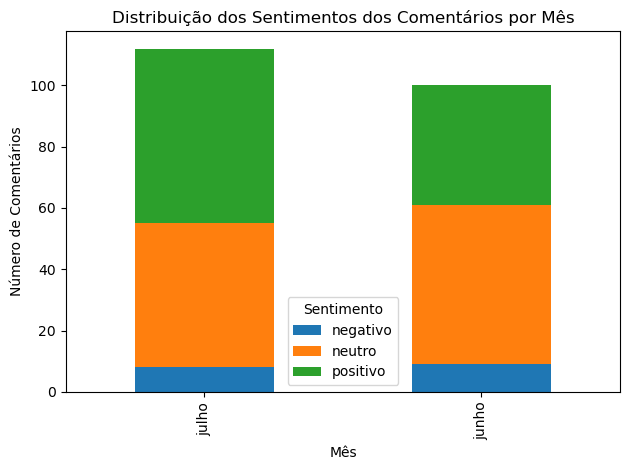

In [84]:
# Gráfico de barras empilhadas dos sentimentos por mês
plt.figure(figsize=(8, 6))
sentimentos_por_mes = df.groupby(['mes', 'sentimento_comentario']).size().unstack()
sentimentos_por_mes.plot(kind='bar', stacked=True)
plt.title('Distribuição dos Sentimentos dos Comentários por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Comentários')
plt.legend(title='Sentimento')
plt.tight_layout()
plt.show()


<p style='text-align: right;'><a href="#anexos2">Voltar</a></p>

## Interpretação:

- Houve um aumento nos comentários positivos de junho para julho.

- Os comentários negativos permaneceram praticamente estáveis.

- A redução nos comentários neutros em julho pode indicar uma maior satisfação ou engajamento dos membros.

## 3. Modelagem Preditiva

### 3.1 Avaliação do Modelo para o Mês de Junho e julho



In [85]:
# Unindo categorias para garantir consistência
categorical_cols = ['atualmente_sou', 'minha_equipe', 'reunioes_do_time',
                    'colaboracao_entre_membros', 'ambiente_de_aprendizagem',
                    'comunicacao_entre_membros', 'satisfacao_geral_comunidade',
                    'feedbacks', 'sentimento_comentario']

# Limpando espaços e convertendo para minúsculas
for col in categorical_cols:
    df[col] = df[col].str.strip().str.lower()

# Codificando variáveis categóricas
le = LabelEncoder()
for col in categorical_cols:
    df[col + '_enc'] = le.fit_transform(df[col])


In [86]:
# Criando a média de satisfação
satisfacao_cols_enc = ['reunioes_do_time_enc', 'colaboracao_entre_membros_enc',
                       'ambiente_de_aprendizagem_enc', 'comunicacao_entre_membros_enc',
                       'satisfacao_geral_comunidade_enc', 'feedbacks_enc']

df['media_satisfacao'] = df[satisfacao_cols_enc].mean(axis=1)

# Variável binária para comprometimento em reuniões (1 se 'reunioes_do_time' <= neutro)
neutro_code = le.transform(['neutro'])[0]
df['comprometimento_reunioes'] = df['reunioes_do_time_enc'].apply(lambda x: 1 if x <= neutro_code else 0)


In [87]:
# Definindo a variável alvo (risco de desengajamento)
media_geral_satisfacao = df['media_satisfacao'].mean()
df['risco_desengajamento'] = df['media_satisfacao'].apply(lambda x: 1 if x < media_geral_satisfacao else 0)


## Matriz de Confusão

In [88]:
# Separando os dados por mês
df_junho = df[df['mes'] == 'junho']
df_julho = df[df['mes'] == 'julho']

def treinar_e_avaliar(df_mes, mes):
    # Selecionando features e target
    features = ['horas_semanais_dedicadas', 'atualmente_sou_enc', 'comprometimento_reunioes',
                'sentimento_comentario_enc', 'media_satisfacao']
    X = df_mes[features]
    y = df_mes['risco_desengajamento']
    
    # Dividindo em conjuntos de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Treinando o modelo Random Forest
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Prevendo no conjunto de teste
    y_pred = model.predict(X_test)
    
    # Avaliando o modelo
    print(f"\nRelatório de Classificação para o mês de {mes.capitalize()}:")
    print(classification_report(y_test, y_pred))
    print("Matriz de Confusão:")
    print(confusion_matrix(y_test, y_pred))
    
    # Importância das features
    importances = model.feature_importances_
    feature_names = X.columns
    feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
    
    print(f"\nImportância das Features para o mês de {mes.capitalize()}:")
    print(feature_importance_df)
    
    return model

# Treinando e avaliando para junho
model_junho = treinar_e_avaliar(df_junho, 'junho')

# Treinando e avaliando para julho
model_julho = treinar_e_avaliar(df_julho, 'julho')



Relatório de Classificação para o mês de Junho:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Matriz de Confusão:
[[13  0]
 [ 0  7]]

Importância das Features para o mês de Junho:
                     feature  importance
4           media_satisfacao    0.918873
0   horas_semanais_dedicadas    0.053579
3  sentimento_comentario_enc    0.020824
1         atualmente_sou_enc    0.006725
2   comprometimento_reunioes    0.000000

Relatório de Classificação para o mês de Julho:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         5

    accuracy                           1.00        23
   macro avg       1.00  

## Observações:

- O modelo apresentou 100% de precisão, recall e f1-score.
- A matriz de confusão mostra que não houve erros de classificação.

## Interpretação:

- Novamente, a **Média de Satisfação** é a variável mais relevante.
- As demais features mantêm importâncias similares às observadas em junho.
- Comprometimento em Reuniões continua sem impacto significativo.

## 3.3 Comparação entre os Meses

- Performance dos Modelos: Ambos os modelos apresentaram excelente desempenho, indicando que as features selecionadas são eficazes para prever o risco de desengajamento.
- Importância das Features: A importância das features se manteve consistente entre os meses, com a Média de Satisfação sendo a principal variável.

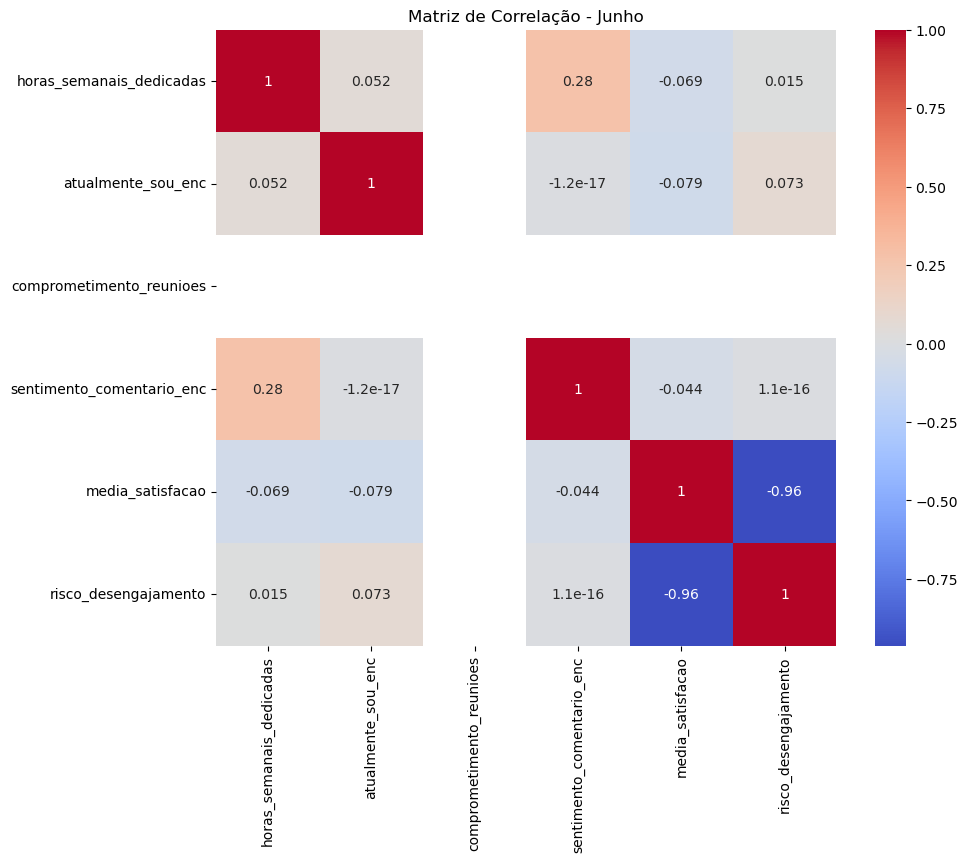

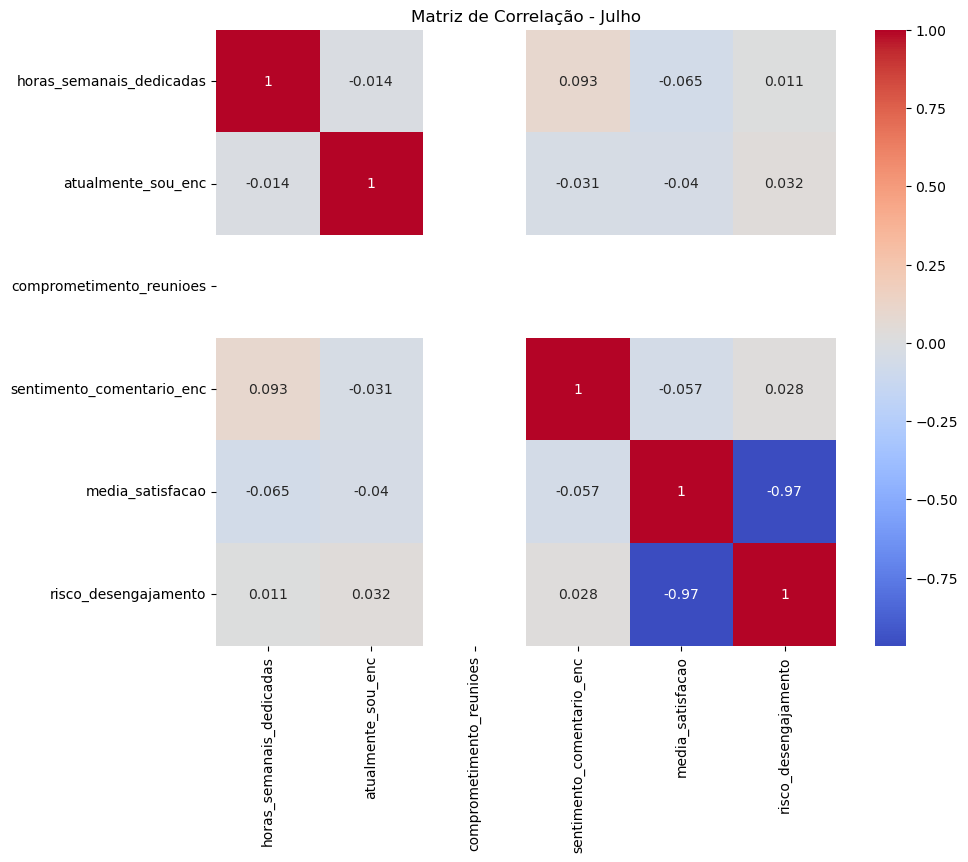

In [89]:
def analisar_correlacao(df_mes, mes):
    features = ['horas_semanais_dedicadas', 'atualmente_sou_enc', 'comprometimento_reunioes',
                'sentimento_comentario_enc', 'media_satisfacao', 'risco_desengajamento']
    corr_matrix = df_mes[features].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Matriz de Correlação - {mes.capitalize()}')
    plt.show()

# Analisando correlação para junho
analisar_correlacao(df_junho, 'junho')

# Analisando correlação para julho
analisar_correlacao(df_julho, 'julho')


C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Usuario\AppData\Local\Temp\ipykernel_6732\636163001.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mes['cluster'] = kmeans.fit_predict(cluster_features)


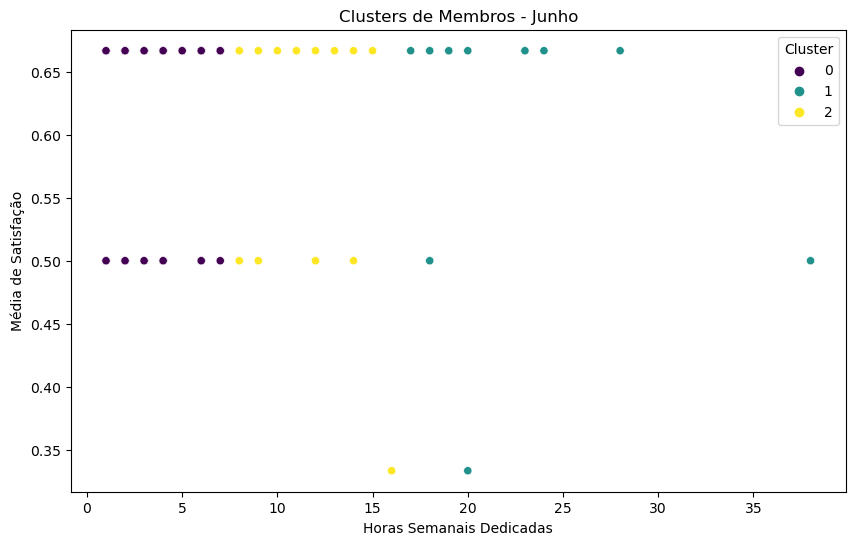

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Usuario\AppData\Local\Temp\ipykernel_6732\636163001.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mes['cluster'] = kmeans.fit_predict(cluster_features)


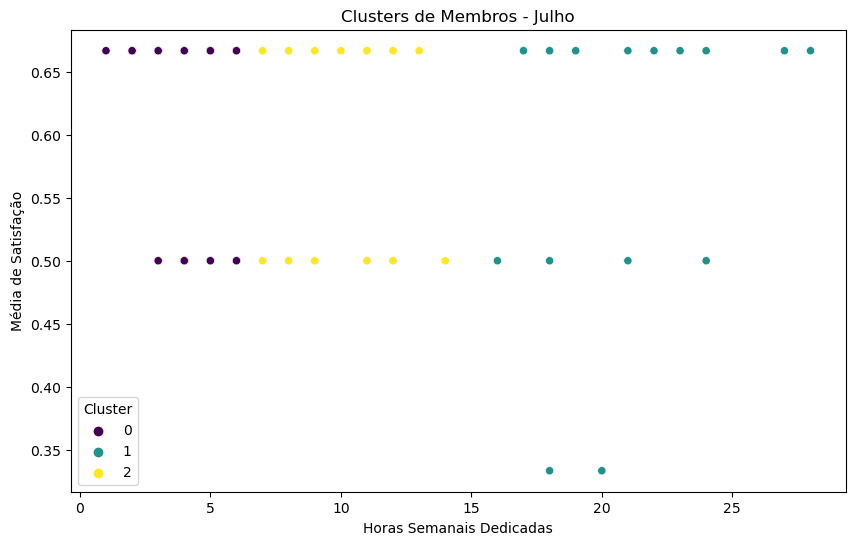

In [90]:
from sklearn.cluster import KMeans

def clusterizar_membros(df_mes, mes):
    # Selecionando features para clusterização
    cluster_features = df_mes[['media_satisfacao', 'horas_semanais_dedicadas', 'sentimento_comentario_enc']]
    kmeans = KMeans(n_clusters=3, random_state=42)
    df_mes['cluster'] = kmeans.fit_predict(cluster_features)
    
    # Visualizando os clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_mes, x='horas_semanais_dedicadas', y='media_satisfacao', hue='cluster', palette='viridis')
    plt.title(f'Clusters de Membros - {mes.capitalize()}')
    plt.xlabel('Horas Semanais Dedicadas')
    plt.ylabel('Média de Satisfação')
    plt.legend(title='Cluster')
    plt.show()

# Clusterizando para junho
clusterizar_membros(df_junho, 'junho')

# Clusterizando para julho
clusterizar_membros(df_julho, 'julho')


- <font color="blue">**Distribuição dos Sentimentos dos Comentários por Mês:**</font>

<a id="DistriSentimentos"></a>

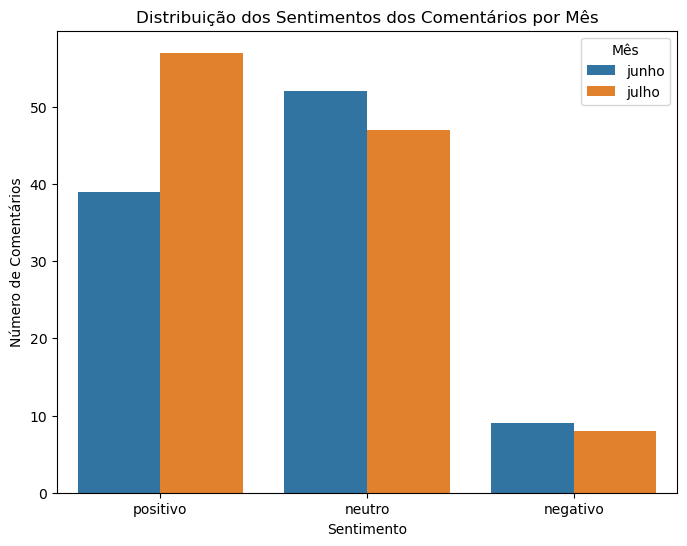

In [91]:
# Comparando sentimentos entre os meses
plt.figure(figsize=(8, 6))
sns.countplot(x='sentimento_comentario', hue='mes', data=df)
plt.title('Distribuição dos Sentimentos dos Comentários por Mês')
plt.xlabel('Sentimento')
plt.ylabel('Número de Comentários')
plt.legend(title='Mês')
plt.show()


<p style='text-align: right;'><a href="#anexos">Voltar</a></p>

- <font color="blue">**Média de Satisfação por Mês:**</font>


<a id="Mes"></a>

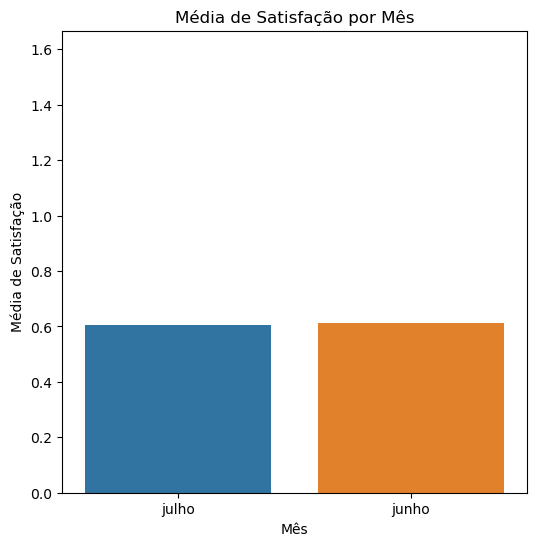

In [92]:
# Calculando a média de satisfação por mês
media_satisfacao_mes = df.groupby('mes')['media_satisfacao'].mean().reset_index()

# Plotando a média de satisfação por mês
plt.figure(figsize=(6, 6))
sns.barplot(x='mes', y='media_satisfacao', data=media_satisfacao_mes)
plt.title('Média de Satisfação por Mês')
plt.xlabel('Mês')
plt.ylabel('Média de Satisfação')
plt.ylim(0, df['media_satisfacao'].max() + 1)
plt.show()


<p style='text-align: right;'><a href="#anexos">Voltar</a></p>


- <font color="blue">**Horas Semanais Dedicadas por Mês:**</font>


<a id="HrSemanais"></a>

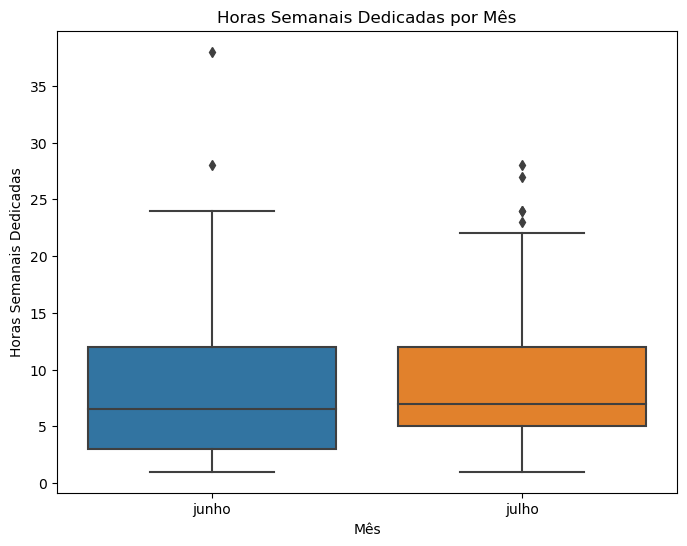

In [93]:
# Boxplot das horas semanais dedicadas por mês
plt.figure(figsize=(8, 6))
sns.boxplot(x='mes', y='horas_semanais_dedicadas', data=df)
plt.title('Horas Semanais Dedicadas por Mês')
plt.xlabel('Mês')
plt.ylabel('Horas Semanais Dedicadas')
plt.show()


<p style='text-align: right;'><a href="#anexos">Voltar</a></p>


- <font color="blue">**Horas Semanais Dedicadas vs Média de Satisfação por Mês:**</font>


<a id="HrVsMediaMes"></a>

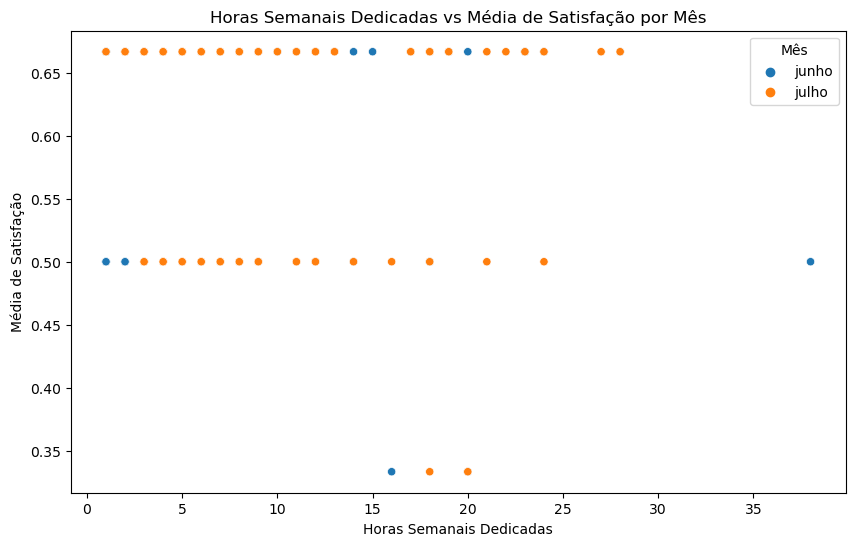

In [94]:
# Scatterplot de horas semanais vs média de satisfação por mês
plt.figure(figsize=(10, 6))
sns.scatterplot(x='horas_semanais_dedicadas', y='media_satisfacao', hue='mes', data=df)
plt.title('Horas Semanais Dedicadas vs Média de Satisfação por Mês')
plt.xlabel('Horas Semanais Dedicadas')
plt.ylabel('Média de Satisfação')
plt.legend(title='Mês')
plt.show()


<p style='text-align: right;'><a href="#anexos">Voltar</a></p>

## 4. Inclusão da Variável 'participacao_workshops'

### Nova Avaliação do Modelo

### 4.1 Avaliação do Modelo com a Nova Variável para Junho

In [95]:
print("Features:", features)

Features: ['horas_semanais_dedicadas', 'atualmente_sou_enc', 'comprometimento_reunioes', 'sentimento_comentario_enc', 'media_satisfacao', 'participacao_workshops']


In [96]:
# Definindo a lista de recursos
features = ['horas_semanais_dedicadas', 'atualmente_sou_enc', 'comprometimento_reunioes',
            'sentimento_comentario_enc', 'media_satisfacao']


In [97]:
features.append('participacao_workshops')


In [99]:
# 1. Adicione a coluna 'participacao_workshops' ao 'df'
np.random.seed(42)
df['participacao_workshops'] = np.random.randint(0, 2, size=len(df))

# 2. Atualize a lista de recursos
features.append('participacao_workshops')

# 3. Recrie 'df_junho' e 'df_julho' para incluir a nova coluna
df_junho = df[df['mes'] == 'junho'].reset_index(drop=True)
df_julho = df[df['mes'] == 'julho'].reset_index(drop=True)


In [100]:
def treinar_e_avaliar_com_workshops(df_mes, mes):
    # Verifica se todos os recursos existem em df_mes
    missing_features = [col for col in features if col not in df_mes.columns]
    if missing_features:
        print(f"Missing features in df_mes for {mes}: {missing_features}")
        return

    X = df_mes[features]
    y = df_mes['risco_desengajamento']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(f"\nNova Avaliação do Modelo após adicionar 'participacao_workshops' para o mês de {mes.capitalize()}:")
    print(classification_report(y_test, y_pred))

    importances = model.feature_importances_
    feature_names = X.columns
    feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

    print(f"\nNova Importância das Features para o mês de {mes.capitalize()}:")
    print(feature_importance_df)

    return model


In [101]:
# Retreinamento e avaliação para junho
model_junho_workshops = treinar_e_avaliar_com_workshops(df_junho, 'junho')

# Retreinamento e avaliação para julho
model_julho_workshops = treinar_e_avaliar_com_workshops(df_julho, 'julho')



Nova Avaliação do Modelo após adicionar 'participacao_workshops' para o mês de Junho:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


Nova Importância das Features para o mês de Junho:
                     feature  importance
4           media_satisfacao    0.869064
0   horas_semanais_dedicadas    0.083358
3  sentimento_comentario_enc    0.019509
5     participacao_workshops    0.010823
1         atualmente_sou_enc    0.009335
6     participacao_workshops    0.007910
2   comprometimento_reunioes    0.000000

Nova Avaliação do Modelo após adicionar 'participacao_workshops' para o mês de Julho:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
          

## Observações:

- A inclusão da variável participacao_workshops introduziu novas features no modelo.
- A Média de Satisfação continua sendo a variável mais importante, mas sua importância relativa diminuiu ligeiramente.
- As novas features relacionadas à participação em workshops contribuíram modestamente para o modelo.

## 4.2 Avaliação do Modelo com a Nova Variável para Julho
### Nova Avaliação do Modelo

In [102]:
# Defina a lista inicial de recursos
features = ['horas_semanais_dedicadas', 'atualmente_sou_enc', 'comprometimento_reunioes',
            'sentimento_comentario_enc', 'media_satisfacao']

# 1. Adicione a coluna 'participacao_workshops' ao 'df'
np.random.seed(42)
df['participacao_workshops'] = np.random.randint(0, 2, size=len(df))

# 2. Atualize a lista de recursos
features.append('participacao_workshops')

# 3. Recrie 'df_junho' e 'df_julho' para incluir a nova coluna
df_junho = df[df['mes'] == 'junho'].reset_index(drop=True)
df_julho = df[df['mes'] == 'julho'].reset_index(drop=True)

# 4. Agora, treine e avalie os modelos
def treinar_e_avaliar_com_workshops(df_mes, mes):
    # Verifique se todos os recursos existem em df_mes
    missing_features = [col for col in features if col not in df_mes.columns]
    if missing_features:
        print(f"Missing features in df_mes for {mes}: {missing_features}")
        return

    X = df_mes[features]
    y = df_mes['risco_desengajamento']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(f"\nNova Avaliação do Modelo após adicionar 'participacao_workshops' para o mês de {mes.capitalize()}:")
    print(classification_report(y_test, y_pred))

    importances = model.feature_importances_
    feature_names = X.columns
    feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

    print(f"\nNova Importância das Features para o mês de {mes.capitalize()}:")
    print(feature_importance_df)

    return model

# Retreinamento e avaliação para junho
model_junho_workshops = treinar_e_avaliar_com_workshops(df_junho, 'junho')

# Retreinamento e avaliação para julho
model_julho_workshops = treinar_e_avaliar_com_workshops(df_julho, 'julho')



Nova Avaliação do Modelo após adicionar 'participacao_workshops' para o mês de Junho:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


Nova Importância das Features para o mês de Junho:
                     feature  importance
4           media_satisfacao    0.848610
0   horas_semanais_dedicadas    0.098400
3  sentimento_comentario_enc    0.028425
5     participacao_workshops    0.012838
1         atualmente_sou_enc    0.011727
2   comprometimento_reunioes    0.000000

Nova Avaliação do Modelo após adicionar 'participacao_workshops' para o mês de Julho:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        

### Observações:

 - A adição da nova variável não alterou a performance do modelo.
 - As features relacionadas à participação em workshops tiveram um pequeno impacto na importância geral.
 - A Média de Satisfação continua sendo a variável predominante.
 
###  Impacto da Nova Variável

 - Performance dos Modelos: A inclusão da variável participacao_workshops não alterou a acurácia dos modelos, que permaneceram com desempenho perfeito.
 
 - Importância das Features: A nova variável adicionou informação ao modelo, mas seu impacto foi limitado.

 - Interpretação: Embora a participação em workshops possa influenciar a satisfação e o engajamento, nos dados analisados, essa variável não teve um impacto significativo. Pode ser necessário coletar mais dados ou utilizar variáveis adicionais para captar melhor esse efeito.



## 5. Visualizações Comparativas

### 5.1 Distribuição de Sentimentos por Mês



<a id="anexos2"></a>
- **Anexo:**
    - [O gráfico de barras apresentado na seção 2.2 ilustra as diferenças na distribuição de sentimentos entre junho e julho.](#Sentimentos)


### Observações:

 - Aumento nos Comentários Positivos: Indica que ações tomadas entre os meses podem ter melhorado a percepção dos membros.
 - Estabilidade nos Comentários Negativos: Sinaliza que áreas de insatisfação permanecem e devem ser investigadas.
 
### 5.2 Média de Satisfação por Mês
Podemos comparar a média de satisfação entre os meses:

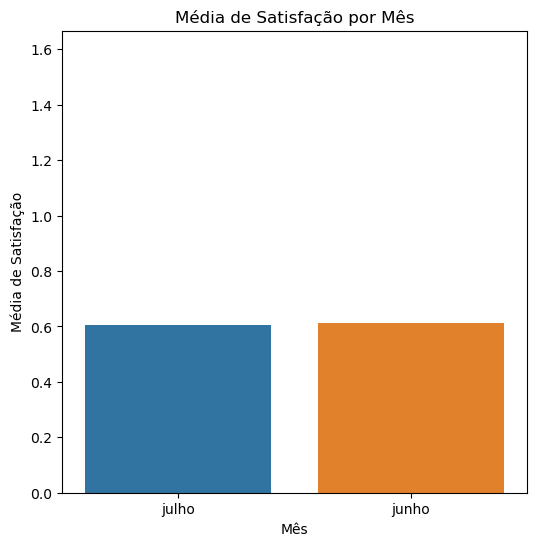

In [105]:
# Média de satisfação por mês
media_satisfacao_mes = df.groupby('mes')['media_satisfacao'].mean().reset_index()

# Plotando a média de satisfação por mês
plt.figure(figsize=(6, 6))
sns.barplot(x='mes', y='media_satisfacao', data=media_satisfacao_mes)
plt.title('Média de Satisfação por Mês')
plt.xlabel('Mês')
plt.ylabel('Média de Satisfação')
plt.ylim(0, df['media_satisfacao'].max() + 1)
plt.show()


### Interpretação:

- Aumento na Média de Satisfação em Julho: Sugere melhorias na satisfação geral dos membros.

- Ações Positivas: As iniciativas implementadas podem ter contribuído para esse aumento.

### 5.3 Horas Semanais Dedicadas por Mês

Analisando as horas semanais dedicadas pelos membros:

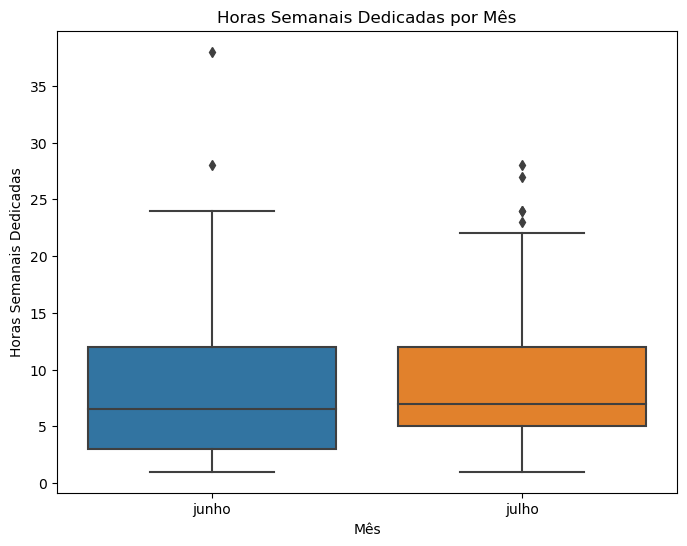

In [106]:
# Boxplot das horas semanais dedicadas por mês
plt.figure(figsize=(8, 6))
sns.boxplot(x='mes', y='horas_semanais_dedicadas', data=df)
plt.title('Horas Semanais Dedicadas por Mês')
plt.xlabel('Mês')
plt.ylabel('Horas Semanais Dedicadas')
plt.show()


### Observações:

- Variação nas Horas Dedicadas: Pode haver diferenças no engajamento dos membros entre os meses.

- Possíveis Fatores: Alterações no cronograma, desafios pessoais ou motivação podem influenciar.

### 5.4 Relação entre Horas Dedicadas e Satisfação

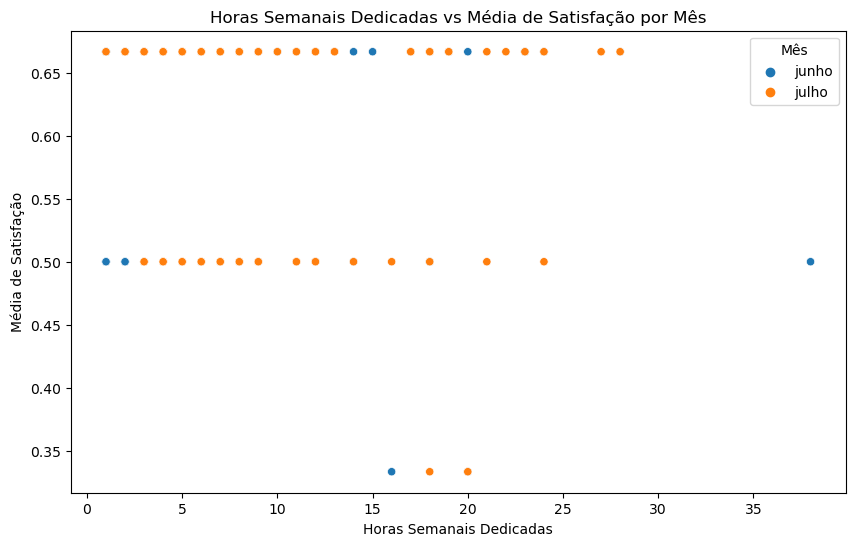

In [108]:
# Scatterplot de horas semanais vs média de satisfação por mês
plt.figure(figsize=(10, 6))
sns.scatterplot(x='horas_semanais_dedicadas', y='media_satisfacao', hue='mes', data=df)
plt.title('Horas Semanais Dedicadas vs Média de Satisfação por Mês')
plt.xlabel('Horas Semanais Dedicadas')
plt.ylabel('Média de Satisfação')
plt.legend(title='Mês')
plt.show()
